# Perceptron Learning Algorithm

<h3>Python Initialization</h3>

Start by setting up the environment

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

### Perceptron

The perceptron is a linear classifier that operates based on the pseudo-code shown below:

<img src='../ref/pseudocode.png'>

<h3>Part One: Perceptron Update</h3>

<p>Implement the function below to update the perceptron given an input vector, label, and weight vector. Do <b>not</b> check if an update is necessary. This function can assume that it is only called when an update should be performed.</p>

In [2]:
def perceptron_update(x, y, w):
    """
    function w=perceptron_update(x,y,w);
    
    Inputs:
    ------
    x : input vector of d dimensions (d)
    y : corresponding label (-1 or +1)
    w : weight vector of d dimensions
    
    Outputs:
    -------
    w : weight vector after updating (d)
    """
    return w + y * x

<h3>Part Two: Implement Perceptron</h3>

<p>Implement function <b><code>perceptron</code></b>. This contains a loop that calls <b><code>perceptron_update</code></b> until it converges or the maximum iteration count has been reached.</p>

In [3]:
def perceptron(xs, ys, max_iter=1_000):
    """
    function w=perceptron(xs,ys);
    
    Inputs:
    ------
    xs       : n input vectors of d dimensions (nxd)
    ys       : n labels (-1 or +1)
    max_iter : i number of iterations (default 100)
    
    Outputs:
    -------
    w : weight vector (1xd)
    b : bias term
    """
    n, d = xs.shape
    w = np.zeros(d)
    b = 0.0
    
    iterations = 0
    while True:
        # set number of misclassifications to zero
        m = 0
        
        # update iteration counter
        iterations += 1
        
        # shuffle the data
        ix = np.random.permutation(n)
        xs = xs[ix,:]
        ys = ys[ix]
        
        # iterate over data
        for x, y in zip(xs, ys):
            if y * np.dot(w.T, x) <= 0:
                # update weights
                w = perceptron_update(x, y, w)
                
                # increase misclassification count
                m += 1
        
        # end condition
        if m == 0 or iterations >= max_iter:
            break
    
    return (w,b)

<h3>Visualize Your Perceptron</h3>

<p> The following script tests the code and visualizes the perceptron on linearly separable data in 2 dimensions.</p>

In [4]:
from numpy.matlib import repmat

def visboundary(w, b, xs, ys):
    res = 300
    symbols = ['ko', 'kx']
    colors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    classes = [-1, 1]
    
    xrange = np.linspace(-5, 5, res)
    yrange = np.linspace(-5, 5, res)
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T
    
    testPoints = np.array([pixelX.flatten(), pixelY.flatten()]).T
    testLabels = np.dot(testPoints, w) + b
    
    Z = testLabels.reshape(res, res)
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=colors)
    plt.scatter(xs[ys == classes[0], 0], xs[ys == classes[0], 1], marker='o', color='k')
    plt.scatter(xs[ys == classes[1], 0], xs[ys == classes[1], 1], marker='x', color='k')
    
    q = -b / (w ** 2).sum() * w
    plt.quiver(q[0], q[1], w[0], w[1], linewidth=1.0, color=[0, 1, 0])
    plt.axis('tight')
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.show()

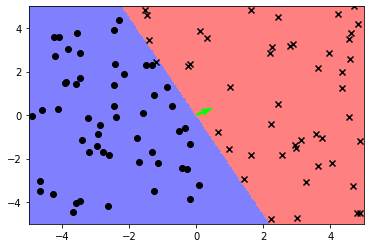

In [5]:
# number of input vectors
N = 100

# generate random (linearly separable) data
xs = np.random.rand(N, 2) * 10 - 5

# defining random hyperplane
w0 = np.random.rand(2)
b0 = np.random.rand() * 2 - 1

# assign labels +1, -1 labels depending on what side of the plane they lie on
ys = np.sign(xs.dot(w0) + b0)

# call perceptron to find w from data
w, b = perceptron(xs.copy(), ys.copy(), max_iter=1_000)

# we can make a pretty visualization
visboundary(w, b, xs, ys)

<h3>Part Three: Make Predictions</h3>

<p><b><code>classify_linear</code></b> applies the weight vector and bias to the input vector. (The bias is an optional parameter. If it is not passed in, assume it is zero.) The predictions return are either 1 or -1.</p>

In [6]:
def classify_linear(xs, w, b=0):
    """
    function preds=classify_linear(xs,w,b)
    
    Inputs:
    ------
    xs : n input vectors of d dimensions (nxd) [could also be a single vector of d dimensions]
    w  : weight vector of dimensionality d
    b  : bias (scalar)
    
    Outputs:
    -------
    preds: predictions (1xn)
    """
    w = w.flatten() 
    predictions = np.zeros(xs.shape[0])
    predictions = np.sign(xs @ w + b)
    
    return predictions

Accuracy Score: 99.00%


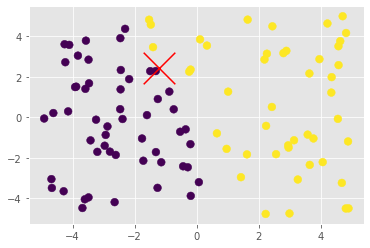

In [7]:
# see how well function performs
import matplotlib as mpl
mpl.style.use('ggplot')

c = classify_linear(xs, w, b)
plt.scatter(xs[ys == c,0], xs[ys == c,1], c=c[ys==c], s=60)
plt.scatter(xs[ys != c,0], xs[ys != c,1], c='red', marker='x', s=1_000)
score = np.mean(c == ys)
print('Accuracy Score: {0:.2%}'.format(score))